# สร้างข้อมูล sounding จาก ERA5 hourly 
* เนื่องจากวันที่เกิดเหตุการณ์พายุลูกเห็บที่เชียงของ ไม่มีข้อมูลตรวจอกาาศช้นบน จากสถานีเชียงใหม่ จึงต้องใช้ข้อมูลจากแบบจำลอง era 5 hourly โดยดูวิธีการและโค้ดจาก https://www.youtube.com/watch?v=C3YwOG8btMk เพื่อที่จะนำไปพลอตใน sharppy
* เชียงรายไม่มีการตรวจวัดสภาพอากาศชั้นบน มีแต่เชียงใหม่ แต่ก็ไม่ได้มีทุกวัน ให้ดูรายชื่อรหัสสถานีตรวจอากาศจากรายงาน wmo ได้ที่ลิงก์  https://library.wmo.int/doc_num.php?explnum_id=9896
* พิกัดภูมิศาสตร์ใช้บริเวณหาดไคร้ ต.เวียง อ.เชียงของ จังหวัดเชียงราย ได้มาจากกุเกิ้ล https://www.google.com/maps/place/Chiang+Khong+District,+Chiang+Rai/@20.2561247,100.4107162,2644m/data=!3m1!1e3!4m5!3m4!1s0x30d6372562c471b5:0x30346c5fa8a7370!8m2!3d20.1651266!4d100.3947116
* ลงโปรแกรม sharppy binary https://github.com/skovic/SHARPpy/releases/tag/v1.4.0-fixed
* ข้อมูล ERA5 hourly https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=overview


## ดาวน์โหลดข้อมูล era5 hourly วันที่ 23/04/2020 เวลา 1100UTC
* เนื่องจากอยากวิเคราะห์เวลา 1800 Local time เมื่อ - 7UTC เท่ากับ 1100 เท่ากับวันที่ 23 เมษายน 2020 เวลา 11 UTC
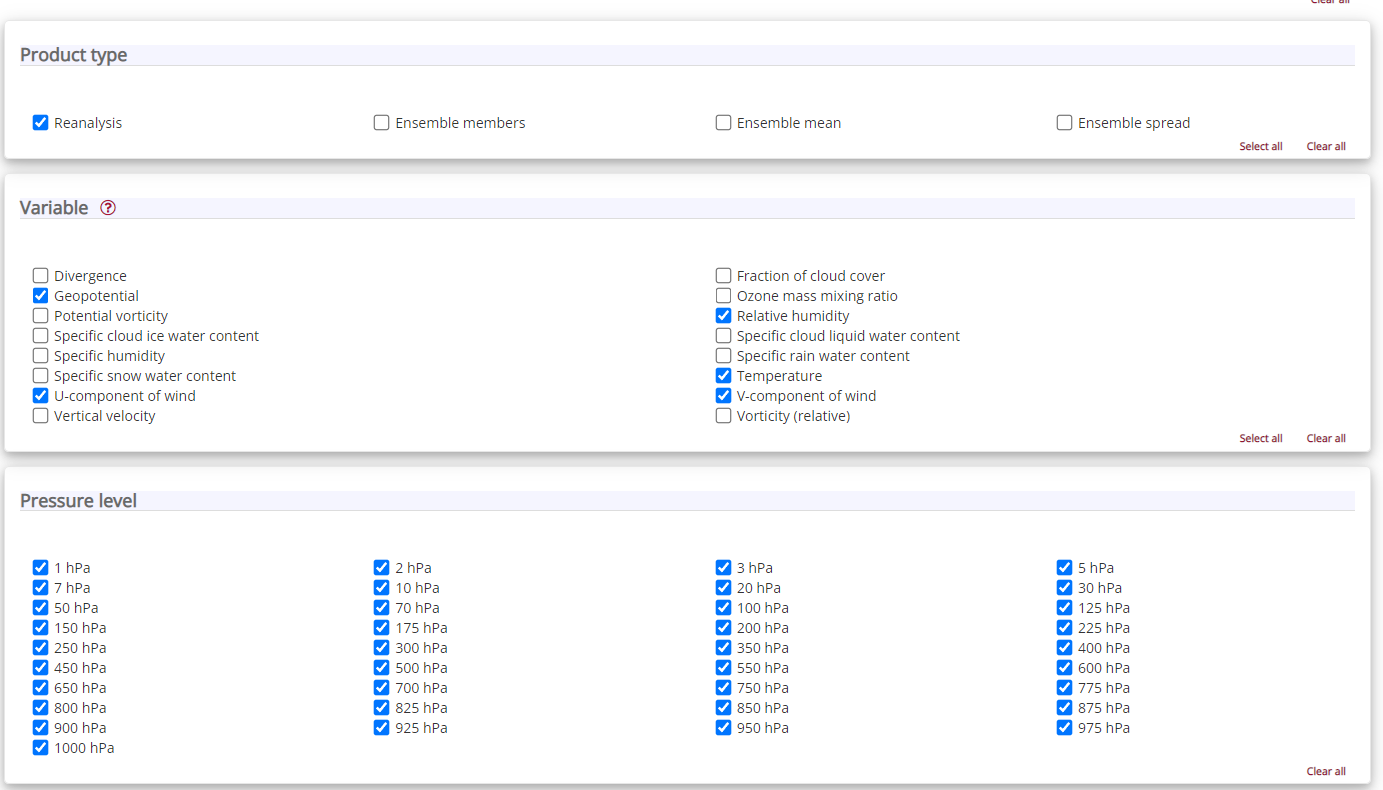

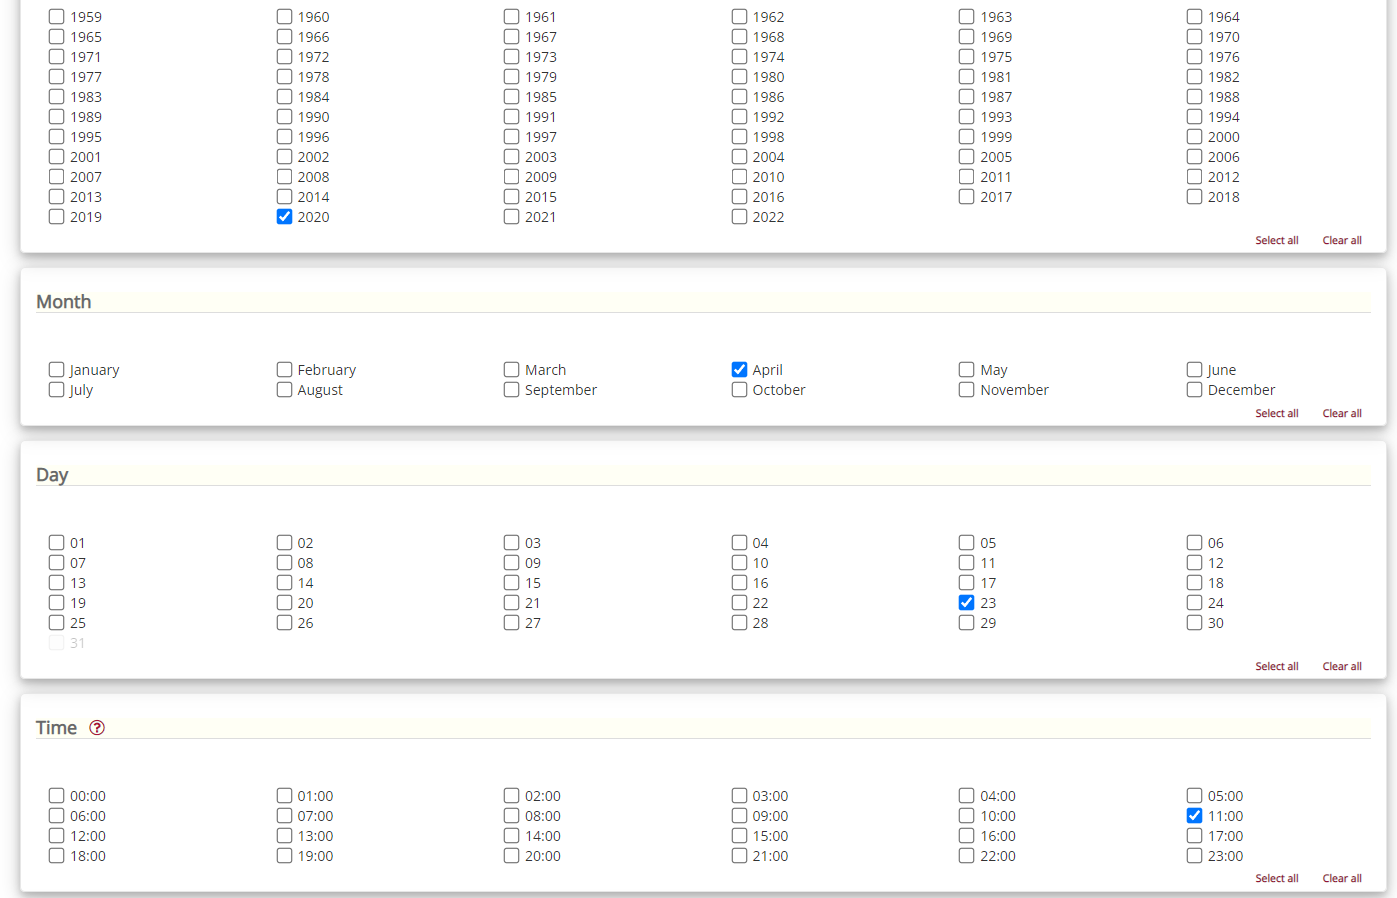

* ใช้ค่าพิกัดต.เวียง อ.เชียงของ จ.เชียงราย  ที่ได้จากกุเกิ้ล
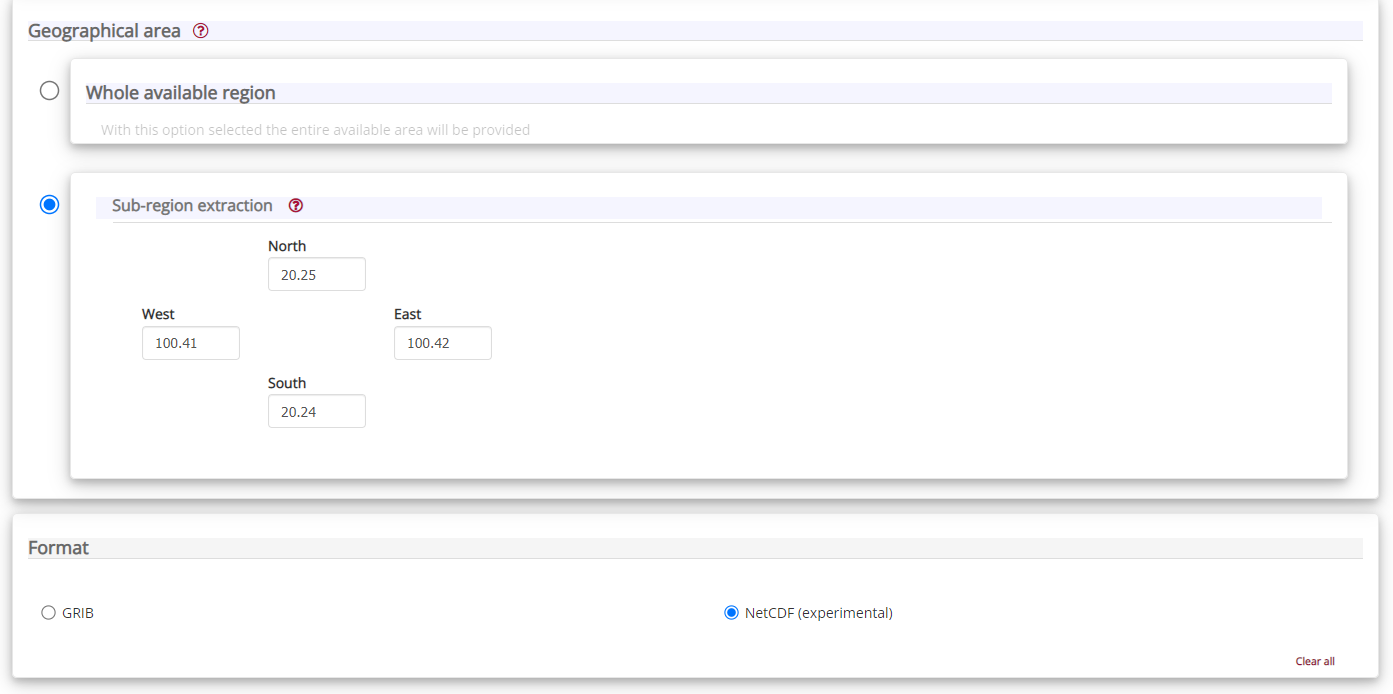


## โค้ดสกัดค่า reanalysis ตามพิกัดที่ต้องการ

In [1]:
from netCDF4 import Dataset
from metpy import calc
from metpy.units import units
import numpy as np

In [2]:
from metpy.calc import equivalent_potential_temperature

# ต้องการคำนวณค่า 3 คอลัมน์สุดท้าย เพื่อให้ได้ตามฟอร์แมท wyoming
ตามลิงก์นี้ https://weather.uwyo.edu/upperair/columns.html
* THTA:	Potential Temperature	[kelvin]
* THTE:	Equivalent Potential Temperature	[kelvin]
* THTV:	Virtual Potential Temperature	[kelvin]

แต่ยังมีค่าที่เรายังไม่มีอีก ต้องหาทางคำนวณ หรือ ดาวน์โหลดค่ามา
* FRPT:	Frost Point Temperature	[celsius]
* RELI:	Relative Humidity with respect to Ice	[%]
* MIXR:	Mixing Ratio	[gram/kilogram]

## อ่านค่าแบบจำลองที่สกัดมาได้

In [3]:
ds = Dataset('./1data/chiangkong_23042020_11UTC.nc')
lat = ds['latitude'][:]
lon = ds['longitude'][:]

## หาตำแหน่งที่ใกล้กับตำแหน่งที่ต้องการของหาดไคร้

In [4]:
c_x, c_y = 20.255734, 100.410341
x, y = np.abs(lat - c_x).argmin(), np.abs(lon + c_y).argmin()

## คำนวณค่าตัวแปรอุตุ

In [5]:
levels = ds['level'][:]
z = ds['z'][0, :, y, x] / 9.81
u = ds['u'][0, :, y, x]
v = ds['v'][0, :, y, x]
temp = ds['t'][0, :, y, x] - 273.15
rh = ds['r'][0, :, y, x]

## 	Dewpoint Temperature

In [6]:
DWPT = np.asarray(calc.dewpoint_from_relative_humidity(np.asarray(temp) * units.degC, np.asarray(rh) * units.percent))
DWPT

array([-106.50275872, -106.25034797,  -99.80500376,  -98.75682101,
        -96.91571235,  -95.38242279,  -91.26100543,  -88.76931554,
        -86.09359841,  -83.86593458,  -80.54990283,  -76.72724985,
        -72.40223773,  -67.17179816,  -63.21965311,  -58.74118803,
        -53.21883182,  -46.63434389,  -34.65942247,  -23.87548648,
        -18.55988644,  -13.18247202,   -8.01267737,   -1.93647467,
          1.97191068,    4.64921878,    6.71249281,    7.71736126,
          8.69396458,    9.57080429,   10.26596988,   10.64866872,
         11.61788574,   12.30189997,   20.50813335,   22.0298258 ,
         23.38480273])

## Wind Direction

In [7]:
DRCT = np.degrees(np.arctan2(u ,v)) + 180
DRCT

masked_array(data=[205.18845182797787, 273.32169165673247,
                   214.73519744920296, 106.06920635578534,
                   77.64624579626992, 90.95723691700864,
                   107.02568383083278, 97.81481495397001,
                   258.8173672129379, 272.3888973797463,
                   258.11199266818915, 265.2532971388925,
                   253.91192452284946, 245.99289384749846,
                   238.88791906653242, 240.09887346146496,
                   245.1586760321876, 260.49150741122145,
                   258.9544684433481, 258.4641036473722,
                   260.6384667611932, 261.99592911098557,
                   264.5537889742732, 259.82795835191604,
                   251.95116699631205, 238.9866395654364,
                   217.61348088013037, 205.5337883638232,
                   196.97772566221167, 188.95242304123602,
                   184.1122289787616, 182.79582543897232,
                   178.71115271442773, 160.26832237038101,
           

## Wind Speed

In [8]:
wspd = np.hypot(u, v) * 1.944
wspd #หน่วยยังเป็น m/s  อ่านเอกสารของ ERA5 ที่ https://apps.ecmwf.int/codes/grib/param-db/?id=131


masked_array(data=[10.41124679, 30.00305037, 34.24832908,  6.63023697,
                    1.02153737, 18.58844931, 15.72505094, 13.67425332,
                    0.91161713, 11.19873215, 48.24057455, 60.80602088,
                   55.47306692, 60.18124474, 64.4853709 , 60.61109206,
                   47.96858404, 38.94456903, 45.52758842, 39.32595224,
                   39.39577297, 36.92781409, 33.92400413, 30.89990092,
                   27.87331545, 22.40533056, 17.65954658, 16.10192635,
                   15.10015927, 14.52106488, 14.22350174, 13.42982113,
                   11.27355308,  6.95690345,  1.97383266,  1.80633366,
                    1.80164653],
             mask=False,
       fill_value=1e+20)

### แปลง หน่วยจาก m/s ไปเป็น knot ตามฟอร์แมทของ wyoming https://weather.uwyo.edu/upperair/columns.html

In [9]:
SKNT = (np.asarray(wspd) * units('m/s')).to(units.knot)
SKNT = np.asarray(SKNT) 

# Relative Humidity

In [10]:
RELH = np.asarray(rh) * units.percent
RELH = np.asarray(RELH) 
RELH

array([2.01752991e-04, 2.01752991e-04, 1.41044821e-03, 7.45392428e-03,
       2.67930477e-02, 3.88799999e-02, 1.67001693e-01, 9.88914438e-01,
       3.11984410e+00, 3.15495642e+01, 5.74422331e+01, 4.01965698e+01,
       3.53762933e+01, 2.94742346e+01, 2.63388792e+01, 2.80552264e+01,
       3.20415032e+01, 2.48630623e+01, 3.68001363e+01, 5.68681029e+01,
       5.78447286e+01, 6.07661450e+01, 6.60034213e+01, 7.92096252e+01,
       7.34272273e+01, 6.46001262e+01, 5.51372514e+01, 5.07013399e+01,
       4.63028980e+01, 4.20627952e+01, 3.77634663e+01, 3.31837202e+01,
       3.10201557e+01, 2.91986520e+01, 4.55535070e+01, 4.56780026e+01,
       4.56900896e+01])

# ข้อสังเกต ความชื้นสัมพัทธ์ ต่ำมาก ๆ 

# Potential Temperature
คำนวณจากวิธี https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.potential_temperature.html#examples-using-metpy-calc-potential-temperature

In [11]:
# แปลงหน่วยอุณหภูมิเพื่อคำนวณค่า PT
T_k = ((np.asarray(temp)) + 273.15) * units.kelvin

In [12]:
THTA = calc.potential_temperature(np.asarray(levels) * units.hPa, np.asarray(T_k) *  units.kelvin) 
THTA = np.asarray(THTA) 

# Equivalent Potential Temperature
ใช้วิธีในการคำนวณจาก https://unidata.github.io/MetPy/dev/examples/calculations/Equivalent_Potential_Temperature.html

In [13]:
THTE = calc.equivalent_potential_temperature(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(DWPT) * units.degC)
THTE = np.asarray(THTE) 

# Virtual Potential Temperature
* คำนวณค่า mixing ratio ก่อน ด้วยการใช้ pressure, temperature และ relative humidity จากลิงก์ https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.mixing_ratio_from_relative_humidity.html
* คำนวณค่า Virtual Potential Temperature จากลิงก์ https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.virtual_potential_temperature.html

## หา mixing ratio

In [14]:
MIXR = calc.mixing_ratio_from_relative_humidity(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(rh) * units.percent) * units('g/kg')
MIXR = np.asarray(MIXR) *1000.0 # เอา 1000 ไปคูณจะกลายเป็นหน่วยกรัม

## หา Virtual Potential Temperature

In [15]:
THTV = calc.virtual_potential_temperature(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(MIXR)  * units('g/kg'))
THTV = np.asarray(THTV)

# บันทึกไฟล์ให้เป็นฟอร์แมท Wyoming
ภาพด้านล่างเป็นตัวอย่างที่ดาวน์โหลดมาจากเวป Wyoming สถานีเชียงใหม่ จะเห็นว่า ค่าความชื้นสัมพัทธ์จะสูงกว่า 70 
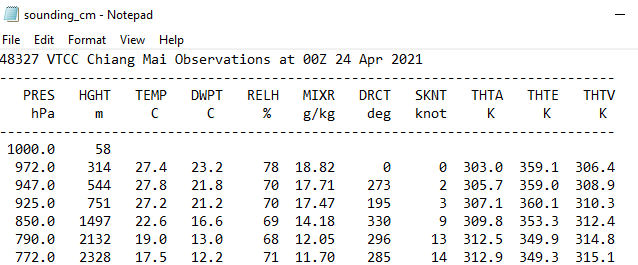

In [16]:
with open('./2output/era5_23042020n_1100utc_wyoming.txt', 'w', encoding = 'utf-8') as f:
    f.write(f"48303 VTCC Chiang Rai ERA5 Simulated at 11z 23 Apr 2020\n\n")
    f.write(f"----------------------------------------------------------------------------------------\n")
    f.write(f"PRES\tHGHT\tTEMP\tDWPT\tRELH\tMIXR\tDRCT\tSKNT\tTHTA\tTHTE\tTHTV\n")
    f.write(f"hPa\tm\tC\tC\t%\tg/kg\tdeg\tknot\tK\tK\tK \n")
    f.write(f"----------------------------------------------------------------------------------------\n")
    

    for i in reversed(range(len(levels))):
        #f.write(f'{levels[i]}\t{z[i]}\t{temp[i]}\t{DWPT[i]}\t{rh[i]}\t{MIXR[i]}\t{DRCT[i]}\t{SKNT[i]}\t{THTA[i]}\t{THTE[i]}\t{THTV[i]}\n')
        #f.write("%.1f\n" %levels[i]) #ok
        f.write(f"{levels[i]:.1f}\t{z[i]:5.1f}\t{temp[i]:3.1f}\t{DWPT[i]:3.1f}\t{rh[i]:3.1f}\t{MIXR[i]:3.4f}\t{DRCT[i]:3.1f}\t{SKNT[i]:3.1f}\t{THTA[i]:4.1f}\t{THTE[i]:4.1f}\t{THTV[i]:4.1f}\t\n")

    f.write('Station information and sounding indices')
    

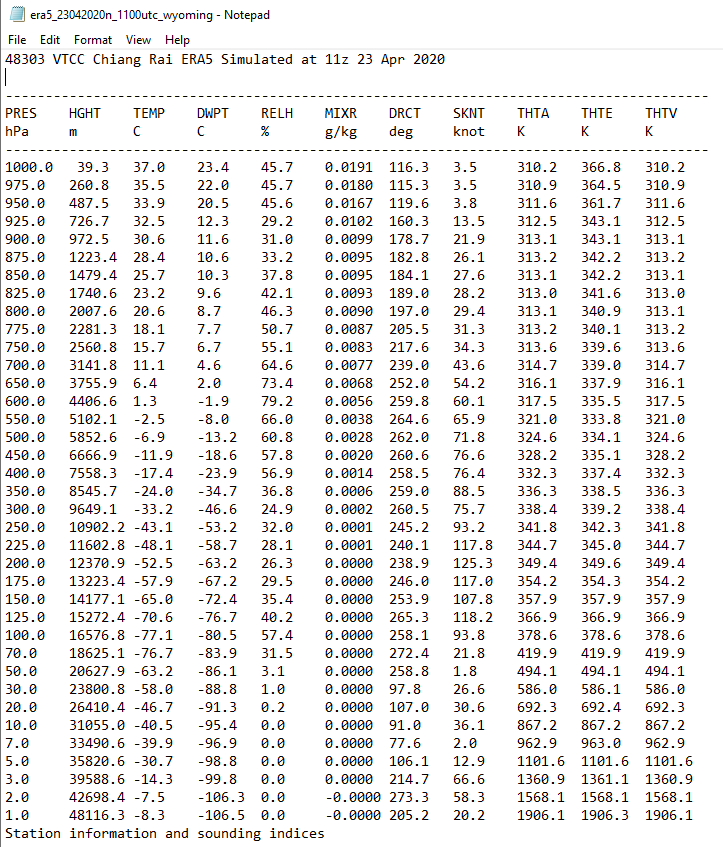

# ต่อไปจะนำไปใช้ในการจำแนกชนิดหยาดน้ำฟ้า CSU Tool